In [3]:
from sklearn.datasets import load_breast_cancer
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
cancer=load_breast_cancer()

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [17]:
print(cancer.data.shape)
print(cancer.data[cancer.target==1].shape)
target_freq=np.bincount(cancer.target)


(569, 30)
(357, 30)
<class 'numpy.ndarray'>


In [6]:
print(cancer.target_names)
print(type(cancer.target_names))

['malignant' 'benign']
<class 'numpy.ndarray'>


In [7]:
print(cancer.feature_names)
print(cancer.feature_names.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(30,)


In [8]:
X,y=cancer.data,cancer.target
print(cancer.target_names)
np.bincount(y)

['malignant' 'benign']


array([212, 357], dtype=int64)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=66)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
#try number of neighbours from 1 to 10
neighbors=range(1,11)
for n_neighbors in neighbors:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    clf.predict(X_test)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

In [91]:

print(training_accuracy)
print(test_accuracy)

[1.0, 0.9765258215962441, 0.9577464788732394, 0.9553990610328639, 0.9483568075117371, 0.9460093896713615, 0.9436619718309859, 0.9413145539906104, 0.9342723004694836, 0.9389671361502347]
[0.9020979020979021, 0.8881118881118881, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9370629370629371, 0.9300699300699301, 0.9300699300699301, 0.916083916083916, 0.916083916083916]


<IPython.core.display.Javascript object>


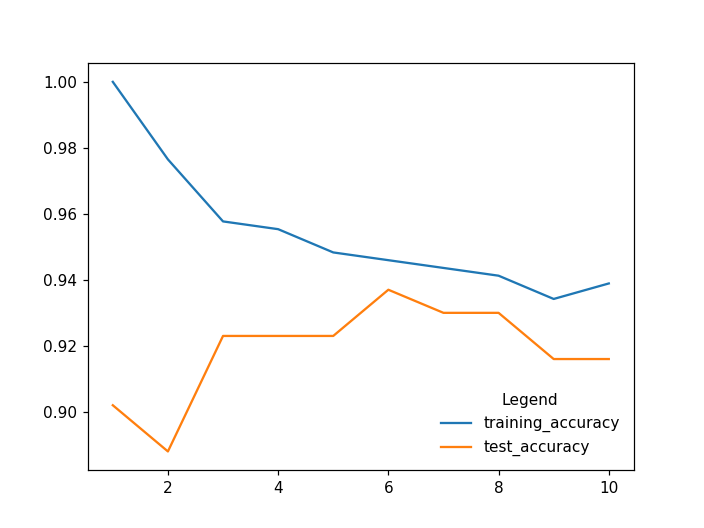

0
8
5
1


In [93]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(neighbors,training_accuracy,label="training_accuracy")
plt.plot(neighbors,test_accuracy,label="test_accuracy")
plt.legend(loc=4,frameon=False,  title="Legend")
print(np.argmax(training_accuracy))
print(np.argmin(np.array((training_accuracy))))
print(np.argmax(np.array(test_accuracy)))
print(np.argmin(test_accuracy))#np.argmax([1,2,3,4,5,6])




In [14]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler=MinMaxScaler()

In [58]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [59]:
np.set_printoptions(suppress=True,precision=2)

In [65]:
print("pre-transformed shape:",X_train.data.shape)
X_train_scaled=scaler.transform(X_train)
print("transformed shape %s" % (X_train_scaled.shape,))
print("per-feature minimum before scaling:\n %s"% X_train.min(axis=0))
#a=np.min([[1,2,3],[4,5,6]],axis=1,keepdims=True)  #keepdims insight
#print(type(a))
print("per-feature maximum before scaling:\n %s"% X_train.max(axis=0))
print("per-feature minimum before scaling:\n %s"% X_train_scaled.min(axis=0))
print("per-feature minimum before scaling:\n %s"% X_train_scaled.max(axis=0))
# scaler.fit(X_test) #not used for X_test
X_test_scaled=scaler.transform(X_test)
print("per-feature minimum before scaling:\n %s"% X_test.min(axis=0))
print("per-feature maximum before scaling:\n %s"% X_test.max(axis=0))
print("per-feature minimum after scaling:\n %s"% X_test_scaled.min(axis=0))
print("per-feature maximum after scaling:\n %s"% X_test_scaled.max(axis=0))



pre-transformed shape: (426, 30)
transformed shape (426, 30)
per-feature minimum before scaling:
 [  6.98   9.71  43.79 143.5    0.05   0.02   0.     0.     0.11   0.05
   0.11   0.36   0.76   6.8    0.     0.     0.     0.     0.01   0.
   7.93  12.02  50.41 185.2    0.07   0.03   0.     0.     0.16   0.06]
per-feature maximum before scaling:
 [  27.22   33.81  182.1  2250.      0.14    0.35    0.43    0.2     0.3
    0.1     1.51    4.88   10.12  233.      0.03    0.14    0.4     0.05
    0.08    0.03   33.12   49.54  220.8  3432.      0.22    0.94    1.25
    0.29    0.66    0.17]
per-feature minimum before scaling:
 [-0.08 -0.04 -0.08 -0.03 -0.12 -0.03  0.    0.   -0.07  0.01 -0.01  0.
 -0.   -0.   -0.06 -0.02  0.    0.    0.05 -0.01 -0.06 -0.03 -0.05 -0.02
 -0.13 -0.02  0.    0.    0.    0.01]
per-feature minimum before scaling:
 [0.95 0.81 0.95 0.89 0.81 1.45 1.17 1.05 1.19 1.04 0.5  1.41 0.44 0.42
 1.5  1.46 4.45 1.29 1.68 1.38 0.89 1.15 0.84 0.79 1.19 0.88 1.13 1.06
 1.53 0.77]

[1.0, 0.9765258215962441, 0.9577464788732394, 0.9553990610328639, 0.9483568075117371, 0.9460093896713615, 0.9436619718309859, 0.9413145539906104, 0.9342723004694836, 0.9389671361502347]
[0.9020979020979021, 0.8881118881118881, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9370629370629371, 0.9300699300699301, 0.9300699300699301, 0.916083916083916, 0.916083916083916]


<IPython.core.display.Javascript object>


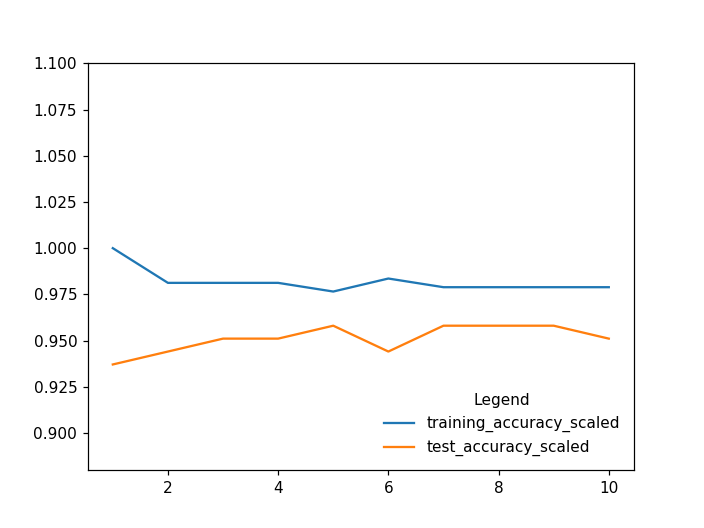

0
8
5
1


(0.88, 1.1)

In [97]:
training_accuracy_scaled=[]
test_accuracy_scaled=[]
#try number of neighbours from 1 to 10
neighbors=range(1,11)
for n_neighbors in neighbors:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_scaled,y_train)
    clf.predict(X_test_scaled)
    training_accuracy_scaled.append(clf.score(X_train_scaled,y_train))
    test_accuracy_scaled.append(clf.score(X_test_scaled,y_test))

print(training_accuracy)
print(test_accuracy)
plt.figure()
plt.plot(neighbors,training_accuracy_scaled,label="training_accuracy_scaled")
plt.plot(neighbors,test_accuracy_scaled,label="test_accuracy_scaled")
plt.legend(loc=4,frameon=False,  title="Legend")
print(np.argmax(np.array(training_accuracy)))
print(np.argmin(training_accuracy))
print(np.argmax(test_accuracy))
print(np.argmin(test_accuracy))
plt.ylim(0.88,1.1)




In [74]:
print(np.argmax(training_accuracy))
print(np.argmin(training_accuracy))
print(np.argmax(test_accuracy))
print(np.argmin(test_accuracy))

0
8
5
1
